# 1.当input为categorical data, output 为 real-value可以使用是什么相关性分析方法?

Okay, this is a very classic problem in data science (DS) practice.

When the input (independent variable) is **Categorical Data** and the output (dependent variable) is a **Real-value**, we cannot use methods like the Pearson correlation coefficient, which measures the linear relationship between two continuous variables.

In this situation, the core analytical idea is to **compare whether there is a significant difference in the mean of the real-value output across different categories**. If a significant difference exists, we can conclude that there is an association between the categorical variable and the continuous variable.

Here are the main correlation analysis methods you can use:

### 1. Analysis of Variance (ANOVA)

This is the most common and central method.

* **Core Idea**: ANOVA determines if a categorical variable has a significant effect on a continuous variable by testing whether the variation in means **between different groups** is significantly greater than the variation **within each group**.
* **How to Interpret**:
    * It calculates an **F-statistic** and a **p-value**.
    * **If the p-value is very small** (e.g., less than 0.05), we can reject the null hypothesis that "all group means are equal" and conclude that there is a significant statistical association between the categorical variable and the continuous variable.
* **Example**:
    * **Input (Categorical)**: User's education level (e.g., elementary school, high school, university, master's, doctorate)
    * **Output (Real-value)**: User's annual income
    * ANOVA can test whether there is a significant difference in the average annual income among people with different education levels. If so, it indicates that "education level" and "annual income" are correlated.

### 2. Eta Squared (η²)

While ANOVA tells us if the association is **significant**, Eta squared tells us how **strong** that association is. It is often used as a supplementary measure of effect size for ANOVA.

* **Core Idea**: Eta squared measures the proportion of the total variance in the output variable that can be explained by the input categorical variable.
* **How to Interpret**:
    * The value of η² ranges from **0 to 1**.
    * A value **closer to 1** indicates that the categorical variable explains more of the variance in the continuous variable, meaning a stronger association.
    * A value **closer to 0** indicates a weaker association.
* **Example**: In the education and income example above, if η² = 0.65, we could say that about 65% of the variance in annual income can be explained by differences in education level. This is a very strong association.

### 3. t-test - A Special Case

You can use a t-test when your categorical variable has **only two categories**.

* **Core Idea**: A t-test is specifically designed to compare the means of two groups to see if they are significantly different. It is essentially a special case of ANOVA for two groups.
* **Example**:
    * **Input (Categorical)**: Smoker (Yes, No)
    * **Output (Real-value)**: Lung capacity
    * A t-test can determine if there is a significant difference in the average lung capacity between smokers and non-smokers.

---

### Summary

| Analysis Goal | Method | Key Metrics | Interpretation |
| :--- | :--- | :--- | :--- |
| **Check if association is significant** | **ANOVA** | F-statistic, p-value | p-value < 0.05 usually means significant |
| | (For two categories) **t-test** | t-statistic, p-value | p-value < 0.05 usually means significant |
| **Measure association strength** | **Eta Squared (η²)** | η² (value between 0-1) | Higher value means stronger association |

For the daily work of a data scientist, when encountering this type of data, **the preferred method is to run an ANOVA and calculate Eta squared simultaneously**. This way, you can determine both if the categorical feature is useful (from the p-value) and how impactful it is (from η²), providing a solid basis for subsequent feature selection and model analysis.

# 📊 Pearson Correlation — Detailed but Concise

## 🧠 Formula
$$
r = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$

### 🔹 Variables Explained
- **X, Y** — Two continuous variables (e.g., height and weight)
- **cov(X, Y)** — Covariance between X and Y, showing how they vary together
- **σₓ, σᵧ** — Standard deviations of X and Y
- **r** — Pearson correlation coefficient

---

## 📈 Meaning of r
- **Range:** -1 ≤ r ≤ 1
  - **r = 1** → perfect positive linear relationship
  - **r = -1** → perfect negative linear relationship
  - **r = 0** → no linear relationship

---

## 📊 Strength Guide
| r value | Strength | Direction |
|----------|-----------|------------|
| 0.7–1.0 | Strong | Positive |
| 0.3–0.7 | Moderate | Positive |
| 0.0–0.3 | Weak | Positive |
| -0.3–0.0 | Weak | Negative |
| -0.7–-0.3 | Moderate | Negative |
| -1.0–-0.7 | Strong | Negative |

---

## 🧩 Example (Python)
```python
from scipy.stats import pearsonr

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

r, p = pearsonr(x, y)
print(f"r: {r}, p-value: {p}")
# r → Correlation coefficient (e.g., r = 0.99 → very strong positive correlation)
# p-value → Probability that correlation happened by chance (p < 0.05 → statistically significant)
```

# 🎯 Relationship between p-value in Correlation and ANOVA

- Both **p-values** represent the **probability that the observed result happened by chance** under the **null hypothesis**.
- In both cases:
  - **Null hypothesis (H₀):** no real relationship or difference exists.
  - **Alternative hypothesis (H₁):** there is a real effect.

| Test Type | Null Hypothesis | What p-value Measures | Interpretation (p < 0.05) |
|------------|----------------|------------------------|----------------------------|
| Pearson Correlation | X and Y are not correlated | Chance of seeing such a high correlation if X and Y are unrelated | Significant correlation |
| ANOVA | All group means are equal | Chance of seeing such large between-group differences if means were equal | Significant difference between groups |

So yes — both p-values tell you **“how likely this result is just luck.”**

# 2.梯度是什么？如何计算?
Of course, let's discuss the second key concept: the gradient.

### 1. What is a Gradient?

In machine learning and mathematics, the **gradient** is a vector that points in the direction of the **fastest increase** of a function at a specific point. The **magnitude** (or length) of this vector represents the rate of that increase—essentially, how steep the slope is at that point.

You can visualize it by imagining you are standing on a mountain:
* **The direction of the gradient**: Points directly up the steepest path from where you are standing.
* **The opposite direction of the gradient (-Gradient)**: Points directly down the steepest path.
* **The magnitude of the gradient**: Represents how steep that path is. The steeper the slope, the longer the gradient vector.

In machine learning model training, our goal is to **minimize a Loss Function**. The loss function is like a vast mountain range, and we want to find the lowest point in a valley. Therefore, we are not interested in the direction of the fastest ascent, but rather the direction of the **fastest descent**. This direction is precisely the **opposite of the gradient**.

The process of finding the minimum of the loss function by calculating the gradient and moving in the opposite direction is the core idea behind the **Gradient Descent** algorithm.

### 2. How to Calculate it?

The gradient is calculated by finding the **partial derivative** of the function with respect to each of its variables.

Assume we have a function $f(w_1, w_2, ..., w_n)$, which depends on multiple variables (in machine learning, these variables are the model's weights $w_1, w_2$, etc.).

The gradient of this function $f$, denoted as $\nabla f$, is a vector composed of all its partial derivatives:

$$
\nabla f = \begin{pmatrix} \frac{\partial f}{\partial w_1} \\ \frac{\partial f}{\partial w_2} \\ \vdots \\ \frac{\partial f}{\partial w_n} \end{pmatrix}
$$

Here, the symbol $\frac{\partial f}{\partial w_1}$ represents the partial derivative of the function $f$ with respect to the variable $w_1$. To calculate it, we treat all other variables ($w_2, ..., w_n$) as constants and differentiate only with respect to $w_1$.

---

#### **A Simple Calculation Example**

Let's assume our model has only one weight $w$ and one bias $b$, and the Loss function ($L$) is a simple squared error:
$L(w, b) = (w \cdot x + b - y)^2$

Here, $x$ and $y$ are a single sample from our training data (the input and the true label), so they are known constants. We need to calculate the gradient of the loss function $L$ with respect to the model parameters $w$ and $b$.

**The gradient $\nabla L$ is a vector containing two partial derivatives:**

$$
\nabla L = \begin{pmatrix} \frac{\partial L}{\partial w} \\ \frac{\partial L}{\partial b} \end{pmatrix}
$$

**Calculation Steps:**

1.  **Calculate the partial derivative with respect to $w$, $\frac{\partial L}{\partial w}$** (treating $b$ as a constant):
    * Using the Chain Rule:
    $$
    \frac{\partial L}{\partial w} = 2 \cdot (w \cdot x + b - y) \cdot \frac{\partial}{\partial w}(w \cdot x + b - y)
    $$
    * In the term $\frac{\partial}{\partial w}(w \cdot x + b - y)$, only $w \cdot x$ depends on $w$, so its derivative is $x$.
    * Result:
    $$
    \frac{\partial L}{\partial w} = 2 \cdot (w \cdot x + b - y) \cdot x
    $$

2.  **Calculate the partial derivative with respect to $b$, $\frac{\partial L}{\partial b}$** (treating $w$ as a constant):
    * Again, using the Chain Rule:
    $$
    \frac{\partial L}{\partial b} = 2 \cdot (w \cdot x + b - y) \cdot \frac{\partial}{\partial b}(w \cdot x + b - y)
    $$
    * In the term $\frac{\partial}{\partial b}(w \cdot x + b - y)$, only $b$ depends on $b$, so its derivative is 1.
    * Result:
    $$
    \frac{\partial L}{\partial b} = 2 \cdot (w \cdot x + b - y) \cdot 1
    $$

**Finally, the gradient vector is:**

$$
\nabla L = \begin{pmatrix} 2x(wx + b - y) \\ 2(wx + b - y) \end{pmatrix}
$$

In actual model training, we would substitute the current numerical values of $w, b, x,$ and $y$ into this formula to get a concrete vector. The model then updates the parameters $w$ and $b$ by taking a small step in the **opposite** direction of this gradient vector. This process is repeated iteratively until the minimum of the loss function is found.

# 3.什么情况会导致梯度爆炸和消失?

Certainly. Both vanishing and exploding gradients are common problems in training deep neural networks, especially Recurrent Neural Networks (RNNs). They both arise from the same fundamental cause: the way gradients are propagated backward through the network using the **chain rule**.

In a deep network, the gradient of the loss function with respect to the weights of an early layer is calculated by multiplying the gradients of all the subsequent layers.

Imagine a simple deep network where the gradient for an early layer is a product like this:
$$\frac{\partial L}{\partial w_{early}} = \frac{\partial L}{\partial a_{final}} \cdot \frac{\partial a_{final}}{\partial a_{final-1}} \cdot \ldots \cdot \frac{\partial a_{early+1}}{\partial a_{early}}$$

This is a long chain of multiplications. The value of each term $\frac{\partial a_{k+1}}{\partial a_k}$ (which is related to the weights and the activation function's derivative at layer $k$) determines what happens to the overall product.

---

### 1. Vanishing Gradients

The vanishing gradient problem occurs when the gradients become extremely small as they are propagated backward, effectively approaching zero.

#### **What Causes It?**

This happens when the terms being multiplied in the chain rule are **consistently less than 1**. Multiplying many numbers that are smaller than 1 together results in an exponentially small number.

**Key culprits include:**

1.  **Activation Functions:** Certain activation functions "squash" their input into a small range. Their derivatives are also small.
    * **Sigmoid Function:** Its derivative has a maximum value of only 0.25. When you are outside the central active region, the derivative is very close to 0.
    * **Tanh Function:** Its derivative is slightly better, with a maximum value of 1.0, but for most inputs, the derivative is still a value less than 1.
2.  **Weight Initialization:** If the weights of the network are initialized to be small values (e.g., with a standard deviation much less than 1), the products will also tend to be small.

#### **What is the Consequence?**

* **Slow or Stalled Training:** The weights and biases of the initial layers (the layers farthest from the output) are not updated effectively because their gradients are nearly zero.
* **Failure to Learn Long-Range Dependencies:** The early layers are crucial for learning basic, low-level features. If they don't learn, the entire network cannot learn complex patterns. In RNNs, this means the model cannot capture relationships between distant words or events in a sequence.

---

### 2. Exploding Gradients

The exploding gradient problem is the opposite: the gradients become excessively large as they are propagated backward, eventually resulting in `NaN` (Not a Number) values.

#### **What Causes It?**

This happens when the terms being multiplied in the chain rule are **consistently greater than 1**. Multiplying many numbers larger than 1 together results in an exponentially large number.

**Key culprits include:**

1.  **Weight Initialization:** This is the most common cause. If the weights are initialized with large values, the gradient values can accumulate and grow uncontrollably during backpropagation.
2.  **A Deep Network Architecture:** Even with weights around 1.0, if you have a very deep network, the repeated multiplication can still lead to an explosion. For example, $(1.15)^{100}$ is a very large number.

#### **What is the Consequence?**

* **Unstable Training:** The model's weights will change drastically with each update. The loss function may fluctuate wildly or go to `NaN` after just a few iterations.
* **Numerical Overflow:** The large gradient values can exceed the floating-point precision limits of the hardware, leading to `NaN` values and causing the training process to crash. The model completely fails to learn.

---

### Summary

| Problem | Cause | Why it Happens | Result |
| :--- | :--- | :--- | :--- |
| **Vanishing Gradients** | Gradient values shrink exponentially towards 0. | Repeated multiplication of numbers **< 1** (e.g., sigmoid derivatives). | Early layers learn very slowly or not at all. Model cannot learn long-range dependencies. |
| **Exploding Gradients** | Gradient values grow exponentially towards infinity. | Repeated multiplication of numbers **> 1** (e.g., large weight initializations). | Training is unstable; loss becomes `NaN`. The model diverges and fails to train. |

# 4.怎么诊断bias和variance?

Diagnosing bias and variance is a critical step in improving a machine learning model's performance. The diagnosis is primarily done by comparing the model's error on the **training dataset** versus its error on a **validation (or test) dataset**.

Let's assume we have a desired "base" error rate, which represents the best possible performance (e.g., human-level performance or the irreducible error).

---

### 1. Understanding the Key Metrics

To diagnose the problem, you need to look at these two values:

* **Training Error:** How well the model performs on the data it was trained on. A low training error means the model has learned the patterns in the training data.
* **Validation Error (or Dev/Test Error):** How well the model performs on new, unseen data. This indicates the model's ability to generalize.

The difference between these two error rates is the key to our diagnosis.

---

### 2. The Four Scenarios

By comparing the training and validation errors, we can identify one of four scenarios:

#### **Scenario 1: High Bias (Underfitting)**

This is the simplest case to diagnose. The model is too simple to capture the underlying patterns in the data.

* **Symptoms:**
    * **High Training Error:** The model performs poorly even on the data it has already seen.
    * **High Validation Error:** The validation error is also high and is very close to the training error.
* **Diagnosis:** If your model isn't even capable of fitting the training data well, it is suffering from high bias. It is "underfitting" the data.
* **Example:** A linear regression model trying to fit a complex, U-shaped curve.

#### **Scenario 2: High Variance (Overfitting)**

This is the most common problem in deep learning. The model has learned the training data too well, including its noise and random fluctuations.

* **Symptoms:**
    * **Low Training Error:** The model performs exceptionally well on the training data.
    * **High Validation Error:** The model performs poorly on unseen data. There is a large gap between the training and validation error.
* **Diagnosis:** If the model aces the training set but fails on the validation set, it is suffering from high variance. It is not generalizing and is "overfitting" the training data.
* **Example:** A very deep decision tree that has created a specific path for almost every single data point in the training set.

#### **Scenario 3: High Bias AND High Variance**

This is a more complex and problematic scenario. The model is wrong, but it's also inconsistently wrong.

* **Symptoms:**
    * **High Training Error:** The model performs poorly on the training data.
    * **Even Higher Validation Error:** The validation error is significantly worse than the training error.
* **Diagnosis:** The model is too simple to capture the correct patterns (high bias), but it has also learned some noise from the training data that doesn't generalize (high variance).
* **Example:** Trying to fit a straight line to a sine wave, but the line is skewed by a few noisy outliers in the training data. The model is wrong (it's a line, not a curve), and it's also sensitive to the specific training data points.

#### **Scenario 4: Low Bias and Low Variance (Good Fit)**

This is the ideal state we want to achieve.

* **Symptoms:**
    * **Low Training Error:** The model fits the training data well.
    * **Low Validation Error:** The validation error is also low and is only slightly higher than the training error.
* **Diagnosis:** The model has successfully learned the underlying patterns and generalizes well to new data.

---

### Summary Table for Diagnosis

| Scenario | Training Error | Validation Error | Diagnosis | Nickname |
| :--- | :--- | :--- | :--- | :--- |
| 1 | High | High (similar to training error) | **High Bias** | Underfitting |
| 2 | Low | High (much higher than training) | **High Variance** | Overfitting |
| 3 | High | Very High (much higher than training) | **High Bias & High Variance** | Worst Case |
| 4 | Low | Low (slightly higher than training) | **Low Bias & Low Variance** | Ideal Model |

### Using Learning Curves for Diagnosis

Another powerful tool is to plot **learning curves**. These graphs show the model's error (e.g., loss or accuracy) on both the training and validation sets as a function of the number of training examples.

* **High Bias Learning Curve:** Both training and validation errors will be high and will plateau quickly. Adding more data will not help because the model is fundamentally too simple to learn from it.
* **High Variance Learning Curve:** There will be a large, persistent gap between the training error (which will be low) and the validation error (which will be high). As you add more data, the gap will tend to shrink, which indicates that gathering more data is a viable solution.

# 5.梯度下降和OLS的区别是什么？
Gradient Descent and Ordinary Least Squares (OLS) can both be used to find the optimal parameters for a linear regression model, but they are fundamentally different methods in their approach and application.

**Ordinary Least Squares (OLS)** is an analytical method, while **Gradient Descent** is an iterative optimization algorithm.

Here is a breakdown of their key differences:

---

### 1. Core Approach: Analytical vs. Iterative

* **Ordinary Least Squares (OLS):** OLS provides a **direct, closed-form solution**. It finds the model parameters by solving a set of linear equations that directly minimize the sum of the squared differences between the predicted and actual values (the "least squares"). This is a purely mathematical derivation.
    * **Analogy:** It's like solving a simple equation like `2x = 10` by directly calculating `x = 10 / 2`. You get the exact answer in one step.
    * **The Formula:** The parameters (coefficients `β`) are calculated at once using a matrix formula known as the normal equation:
        $$\beta = (X^T X)^{-1} X^T y$$

* **Gradient Descent (GD):** GD is an **iterative optimization algorithm**. It doesn't solve for the answer directly. Instead, it starts with a random guess for the parameters and takes small, repeated steps to find the minimum of the loss function (which, for linear regression, is the same sum of squared errors that OLS minimizes).
    * **Analogy:** It's like finding the lowest point in a valley while blindfolded. You start somewhere, feel the slope (the gradient) around you, and take a small step in the steepest downward direction. You repeat this process until you reach the bottom.
    * **The Process:**
        1.  Initialize parameters (weights) with random values.
        2.  Calculate the gradient of the loss function.
        3.  Update the parameters by taking a small step in the opposite direction of the gradient.
        4.  Repeat steps 2 and 3 until the loss stops decreasing (convergence).

---

### 2. Application Scope

* **OLS:** Is **specifically designed for linear regression**. It cannot be directly used for more complex models like logistic regression, neural networks, or support vector machines. Its application is narrow but highly effective for linear models.

* **Gradient Descent:** Is a **general-purpose optimization algorithm**. It can be used to find the minimum of almost any differentiable function. This makes it extremely versatile and the foundational optimizer for a vast range of machine learning models, including nearly all of deep learning.

---

### 3. Computational Complexity and Scalability

* **OLS:** The calculation involves inverting a matrix (`(X^T X)^{-1}`). Matrix inversion is a computationally expensive operation, typically with a complexity of about $O(n^3)$, where `n` is the number of features.
    * **Pro:** Very fast for datasets with a small number of features.
    * **Con:** It becomes extremely slow or computationally infeasible for datasets with a very large number of features (e.g., hundreds of thousands).

* **Gradient Descent:** The complexity of each iteration is typically $O(m \cdot n)$, where `m` is the number of data points and `n` is the number of features.
    * **Pro:** Scales much better to datasets with a massive number of features. Variants like Stochastic Gradient Descent (SGD) are even more efficient as they update parameters using only one or a few data points at a time.
    * **Con:** May require many iterations to converge. Finding the right learning rate can be tricky.

---

### 4. Need for Feature Scaling

* **OLS:** Does not require feature scaling. The analytical solution will be the same regardless of the scale of the input features.

* **Gradient Descent:** Is very sensitive to the scale of the features. If one feature has a much larger range than others, the loss function becomes a steep, narrow ellipse, and GD will take a long, zigzagging path to the minimum. Therefore, **feature scaling (like standardization or normalization) is almost always a required preprocessing step** for Gradient Descent.

---

### Summary Table

| Feature | Ordinary Least Squares (OLS) | Gradient Descent (GD) |
| :--- | :--- | :--- |
| **Method Type** | Analytical, closed-form solution | Iterative optimization algorithm |
| **How it Works** | Solves a matrix equation directly (Normal Equation) | Takes repeated steps "downhill" on the loss function |
| **Solution Quality** | Provides the exact, optimal solution | Provides a very good approximation of the optimal solution |
| **Application** | Specific to Linear Regression | General-purpose; used in most ML/DL models |
| **Scalability** | Poor for many features (due to matrix inversion) | Excellent; scales well to millions of features |
| **Feature Scaling**| Not required | Required for good performance |
| **Hyperparameters**| None | Requires a learning rate (`alpha`) and number of iterations |

**Conclusion:** For a standard linear regression problem with a manageable number of features, **OLS is often the preferred method** because it is fast, simple, and gives the exact solution without needing to tune any hyperparameters. However, for almost any other machine learning problem or for linear regression on very high-dimensional data, **Gradient Descent (and its variants) is the necessary and more scalable approach.**

In [1]:
# To determine if a categorical feature is related to a continuous target, we can use an Analysis of Variance (ANOVA) test. The core idea is to see if the means of the continuous variable are significantly different across the categories.
import numpy as np
from scipy import stats

# --- Sample Data ---
# Imagine we have data on car prices from three different brands.
# Input (Categorical): car_brand
# Output (Real-value): price

# Prices for Brand A cars (mean around 25k)
prices_brand_a = np.random.normal(25000, 3000, 50)
# Prices for Brand B cars (mean around 26k - similar to A)
prices_brand_b = np.random.normal(26000, 3000, 50)
# Prices for Brand C cars (mean around 35k - different)
prices_brand_c = np.random.normal(35000, 3000, 50)

# --- ANOVA Test ---
# The f_oneway function performs a 1-way ANOVA.
f_statistic, p_value = stats.f_oneway(prices_brand_a, prices_brand_b, prices_brand_c)

print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-value: {p_value}")

# --- Interpretation ---
if p_value < 0.05:
    print("\nThe p-value is less than 0.05, so we reject the null hypothesis.")
    print("Conclusion: There is a significant difference in prices between the car brands. The 'brand' is a useful feature. ✅")
else:
    print("\nThe p-value is greater than 0.05.")
    print("Conclusion: There is no significant difference in prices. The 'brand' may not be a useful feature. ❌")

F-Statistic: 188.32
P-value: 2.8083476971042504e-41

The p-value is less than 0.05, so we reject the null hypothesis.
Conclusion: There is a significant difference in prices between the car brands. The 'brand' is a useful feature. ✅


# 🧩 ANOVA — F-Statistic and P-Value (Concise)

## 1️⃣ What ANOVA Does
Tests if **group means differ significantly** (e.g., car prices across brands).

- **H₀:** All means are equal → μA = μB = μC
- **H₁:** At least one mean is different

---

## 2️⃣ F-Statistic
$$
F = \frac{\text{Between-group variance}}{\text{Within-group variance}}
$$

- **Between-group variance:** how far each group mean is from overall mean (signal)
- **Within-group variance:** spread within each group (noise)
- **Large F → means differ; small F → means similar**

---

## 3️⃣ P-Value
Probability of observing the F-statistic if H₀ were true.

| p-value | Interpretation |
|----------|----------------|
| < 0.05 | Reject H₀ — groups differ significantly ✅ |
| ≥ 0.05 | Fail to reject H₀ — no significant difference ❌ |

---

## 4️⃣ Example

→ Between-group differences are much larger than within-group noise → reject H₀.

---

## 5️⃣ Formula Summary
$$
MS_B = \frac{SS_B}{k-1}, \quad MS_W = \frac{SS_W}{N-k}, \quad F = \frac{MS_B}{MS_W}
$$

---

## ✅ Summary Table
| Term | Meaning | Interpretation |
|------|----------|----------------|
| F-statistic | Ratio of signal to noise | Large → significant difference |
| P-value | Prob. of seeing this F if H₀ true | Small → reject H₀ |


In [1]:
# --- Single Data Point and Initial Parameters ---
x = 2.0  # Input feature
y = 5.0  # True label

# Initial random guess for parameters
w = 0.5
b = 1.0

# --- Forward Pass: Make a prediction ---
prediction = w * x + b
print(f"Initial Prediction: {prediction}")

# --- Calculate Loss (Squared Error) ---
loss = (prediction - y)**2
print(f"Initial Loss: {loss:.2f}")

# --- Backward Pass: Calculate the Gradient ---
# This is the core of the calculation.
grad_w = 2 * x * (prediction - y) # dL/dw
grad_b = 2 * (prediction - y)     # dL/db

# The gradient is a vector of these partial derivatives
gradient = (grad_w, grad_b)

print(f"\nGradient with respect to w (dL/dw): {grad_w:.2f}")
print(f"Gradient with respect to b (dL/db): {grad_b:.2f}")
print(f"Gradient Vector ∇L = ({grad_w:.2f}, {grad_b:.2f})")
print("\nInterpretation: To decrease the loss, we should decrease 'w' and 'b' (since their gradients are negative).")

Initial Prediction: 2.0
Initial Loss: 9.00

Gradient with respect to w (dL/dw): -12.00
Gradient with respect to b (dL/db): -6.00
Gradient Vector ∇L = (-12.00, -6.00)

Interpretation: To decrease the loss, we should decrease 'w' and 'b' (since their gradients are negative).


In [2]:
# --- Simulation Parameters ---
num_layers = 50
initial_gradient = 1.0

# --- Scenario 1: Vanishing Gradient ---
# Caused by small weights (<1) and activation derivatives (<1), like sigmoid
w_small = 0.5
activation_derivative_small = 0.25 # Max derivative of sigmoid is 0.25

vanishing_grad = initial_gradient
for i in range(num_layers):
    vanishing_grad *= w_small * activation_derivative_small
    if (i+1) % 10 == 0:
      print(f"Layer {i+1}, Vanishing Gradient: {vanishing_grad}")

print("\nResult: The gradient shrinks exponentially to almost zero. 📉\n")

# --- Scenario 2: Exploding Gradient ---
# Caused by large weights (>1)
w_large = 1.5
# Assume activation derivative is 1 (like ReLU for positive inputs)
activation_derivative_large = 1.0

exploding_grad = initial_gradient
for i in range(num_layers):
    exploding_grad *= w_large * activation_derivative_large
    if (i+1) % 10 == 0:
        # Using scientific notation for large numbers
        print(f"Layer {i+1}, Exploding Gradient: {exploding_grad:e}")

print("\nResult: The gradient grows exponentially to an enormous value. 📈")

Layer 10, Vanishing Gradient: 9.313225746154785e-10
Layer 20, Vanishing Gradient: 8.673617379884035e-19
Layer 30, Vanishing Gradient: 8.077935669463161e-28
Layer 40, Vanishing Gradient: 7.52316384526264e-37
Layer 50, Vanishing Gradient: 7.006492321624085e-46

Result: The gradient shrinks exponentially to almost zero. 📉

Layer 10, Exploding Gradient: 5.766504e+01
Layer 20, Exploding Gradient: 3.325257e+03
Layer 30, Exploding Gradient: 1.917511e+05
Layer 40, Exploding Gradient: 1.105733e+07
Layer 50, Exploding Gradient: 6.376215e+08

Result: The gradient grows exponentially to an enormous value. 📈


--- High Bias (Underfitting) ---
Training Error: 0.233
Validation Error: 0.149
Diagnosis: Both errors are high. The model is too simple. 🧐

--- High Variance (Overfitting) ---
Training Error: 0.026
Validation Error: 0.049
Diagnosis: Training error is very low, but validation error is high. The model doesn't generalize. 🤯


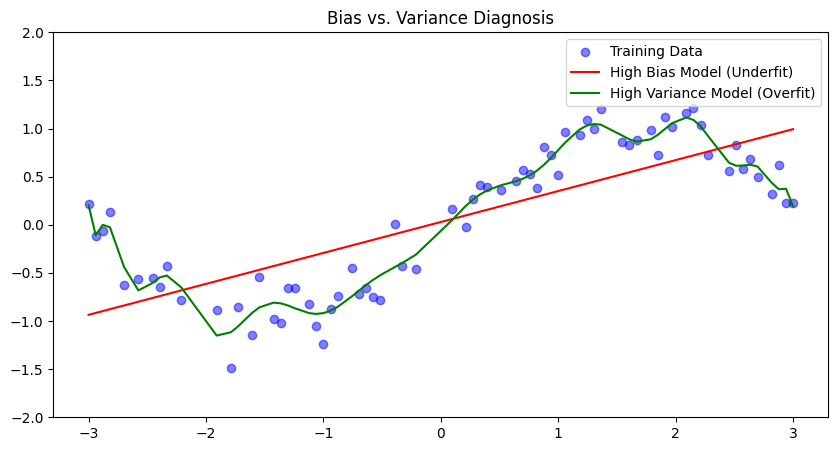

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# --- Generate Sample Non-linear Data ---
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, 100)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

# --- Scenario 1: High Bias (Underfitting) ---
# A simple linear model trying to fit a sine wave.
model_bias = LinearRegression()
model_bias.fit(X_train, y_train)

train_error_bias = mean_squared_error(y_train, model_bias.predict(X_train))
val_error_bias = mean_squared_error(y_val, model_bias.predict(X_val))

print(f"--- High Bias (Underfitting) ---")
print(f"Training Error: {train_error_bias:.3f}")
print(f"Validation Error: {val_error_bias:.3f}")
print("Diagnosis: Both errors are high. The model is too simple. 🧐\n")

# --- Scenario 2: High Variance (Overfitting) ---
# A very complex polynomial model that can memorize the training data.
model_variance = make_pipeline(PolynomialFeatures(degree=20), LinearRegression())
model_variance.fit(X_train, y_train)

train_error_var = mean_squared_error(y_train, model_variance.predict(X_train))
val_error_var = mean_squared_error(y_val, model_variance.predict(X_val))

print(f"--- High Variance (Overfitting) ---")
print(f"Training Error: {train_error_var:.3f}")
print(f"Validation Error: {val_error_var:.3f}")
print("Diagnosis: Training error is very low, but validation error is high. The model doesn't generalize. 🤯")

# --- Plotting the models ---
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='Training Data', color='blue', alpha=0.5)
plt.plot(X, model_bias.predict(X), color='red', label='High Bias Model (Underfit)')
plt.plot(np.sort(X_train, axis=0), model_variance.predict(np.sort(X_train, axis=0)), color='green', label='High Variance Model (Overfit)')
plt.title("Bias vs. Variance Diagnosis")
plt.legend()
plt.ylim(-2, 2)
plt.show()

In [4]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor

# --- Generate Sample Linear Data ---
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# OLS requires unscaled data
# SGD performs best with scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Method 1: Ordinary Least Squares (Analytical Solution) ---
ols_model = LinearRegression()
ols_model.fit(X, y)

print("--- OLS (Analytical) ---")
print(f"Coefficient: {ols_model.coef_[0]:.2f}")
print(f"Intercept: {ols_model.intercept_:.2f}")
print("Finds the exact solution in one step. No hyperparameters to tune.\n")

# --- Method 2: Stochastic Gradient Descent (Iterative Solution) ---
# Requires tuning hyperparameters like learning rate (eta0) and iterations (max_iter)
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
sgd_model.fit(X_scaled, y)

print("--- Gradient Descent (Iterative) ---")
# The coefficient is for the *scaled* data, so we un-scale it to compare
# coef_unscaled = coef_scaled / scale_
unscaled_coef = sgd_model.coef_[0] / scaler.scale_[0]
print(f"Coefficient (unscaled): {unscaled_coef:.2f}")
print(f"Intercept: {sgd_model.intercept_[0]:.2f}")
print("Iteratively approaches a solution that is very close to the OLS one.")

--- OLS (Analytical) ---
Coefficient: 87.00
Intercept: 2.86
Finds the exact solution in one step. No hyperparameters to tune.

--- Gradient Descent (Iterative) ---
Coefficient (unscaled): 86.99
Intercept: -0.66
Iteratively approaches a solution that is very close to the OLS one.


In [9]:
import numpy as np

# --- Generate dummy data ---
np.random.seed(42)
X = np.random.rand(5, 2) * 10   # 5 samples, 2 features
true_w = np.array([[2.0], [3.0]])
true_b = 5.0
y = X @ true_w + true_b + np.random.randn(5, 1)  # add a little noise

# --- Option 1: Compute bias separately ---
# Closed-form OLS for weights (without bias)
X_mean = X.mean(axis=0)
y_mean = y.mean()

# Center X and y
X_centered = X - X_mean
y_centered = y - y_mean

# Compute weights using centered data
w = np.linalg.inv(X_centered.T @ X_centered) @ X_centered.T @ y_centered

# Compute bias
b = y_mean - X_mean @ w

print("Option 1 - Separate bias:")
print("Weights:", w.ravel())
print("Bias:", b.item(), "\n")

# --- Option 2: Include bias term in X ---
X_aug = np.hstack([np.ones((X.shape[0], 1)), X])  # add bias column
w_aug = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y

print("Option 2 - Augmented X:")
print("Bias:", w_aug[0, 0])
print("Weights:", w_aug[1:, 0])

Option 1 - Separate bias:
Weights: [2.15623657 2.98028589]
Bias: 4.405993838972105 

Option 2 - Augmented X:
Bias: 4.405993838972088
Weights: [2.15623657 2.98028589]


# 1.什么是information Gain?
This is a core concept for **Decision Tree** algorithms. 🌳

In short: **Information Gain** is a metric that measures how much a feature *reduces uncertainty* (or "impurity") about the data.

When building a decision tree, the algorithm must decide which feature to use for splitting the data at each node. It chooses the feature that provides the **highest Information Gain**, as this feature does the best job of separating the data into "purer" groups.

---

### 1. Understanding "Uncertainty" (Entropy)

To understand Information Gain, you must first understand **Entropy**.

* **Entropy** is a measure of randomness, impurity, or uncertainty in a dataset. The higher the entropy, the more "mixed" the data is.
* **High Entropy (Maximum Uncertainty)** 🤯: Imagine a dataset of 10 coins, with 5 heads and 5 tails. If you pick one at random, you have no idea what you'll get. This is maximum entropy (entropy = 1).
* **Low Entropy (Low Uncertainty)** 🤔: A dataset of 10 coins with 9 heads and 1 tail. You are *pretty sure* you'll get heads. This is low entropy.
* **Zero Entropy (No Uncertainty)** ✅: A dataset of 10 coins with 10 heads. You are 100% certain you'll get heads. This is zero entropy (entropy = 0).

The goal of a decision tree is to split the data until all leaf nodes have **zero entropy** (or as low as possible).

---

### 2. What is Information Gain?

**Information Gain** is the change in entropy from before to after splitting the data on a feature.

**Information Gain = Entropy(Before Split) - Weighted Average Entropy(After Split)**

The `Entropy(Before Split)` is the entropy of the parent node. The `Weighted Average Entropy(After Split)` is the sum of the entropies of all child nodes, weighted by how many data points went into each child node.

#### The Formula

$$
\text{Information Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \cdot \text{Entropy}(S_v)
$$

* $S$ is the current dataset (parent node).
* $A$ is the feature we are testing for the split (e.g., "Outlook").
* $\text{Entropy}(S)$ is the entropy of the parent node.
* $\text{Values}(A)$ are the possible values of feature A (e.g., "Sunny", "Rainy").
* $S_v$ is the subset of data where feature A has value $v$ (e.g., all "Sunny" data).
* $\frac{|S_v|}{|S|}$ is the *weight* of that child node (proportion of data points in it).

---

### 3. A Simple Example

Let's decide if we should **"Play Tennis"**.

**Dataset (S):** 10 days
* 5 days "Play"
* 5 days "Don't Play"
* **Entropy(S) = High (Maximum uncertainty)**

We have two features to split on: "Outlook" and "Humidity".

#### Split 1: Using Feature A ("Outlook")

* **Child 1 (Outlook=Sunny):** 6 days total.
    * 5 "Play", 1 "Don't Play"  ->  **Very Low Entropy** (almost pure)
* **Child 2 (Outlook=Rainy):** 4 days total.
    * 0 "Play", 4 "Don't Play"  ->  **Zero Entropy** (perfectly pure)

* **Gain(Outlook)** = `Entropy(S)` - `[ (6/10) * Entropy(Sunny) + (4/10) * Entropy(Rainy) ]`
* **Gain(Outlook)** = `High` - `[ (0.6) * Very Low + (0.4) * Zero ]`
* This results in a **LARGE** Information Gain.

#### Split 2: Using Feature B ("Humidity")

* **Child 1 (Humidity=High):** 5 days total.
    * 2 "Play", 3 "Don't Play"  ->  **High Entropy** (still very mixed)
* **Child 2 (Humidity=Normal):** 5 days total.
    * 3 "Play", 2 "Don't Play"  ->  **High Entropy** (also very mixed)

* **Gain(Humidity)** = `Entropy(S)` - `[ (5/10) * Entropy(High) + (5/10) * Entropy(Normal) ]`
* **Gain(Humidity)** = `High` - `[ (0.5) * High + (0.5) * High ]`
* This results in a **VERY SMALL** (or near zero) Information Gain.

---

### 4. Conclusion

**Gain(Outlook) >> Gain(Humidity)**

The Information Gain from splitting on "Outlook" is much higher than splitting on "Humidity".

Therefore, the decision tree algorithm (like ID3) will choose **"Outlook"** as the first feature to split on (the root node), because it does the best job of reducing uncertainty and separating the data into pure groups.

# 2.什么是Gini index?
The **Gini Index**, or more accurately **Gini Impurity**, is another metric used in decision tree algorithms (like CART) to measure the "impurity" or "mixed-ness" of a node.

It is a popular alternative to **Entropy** (which is used for Information Gain) because it is computationally faster.

In short: **Gini Impurity measures the probability of misclassifying a randomly chosen element from the dataset if it were randomly labeled according to the class distribution in that node.**

A **lower Gini Index** is better, meaning the node is "purer."

---

### 1. How to Interpret the Gini Index Value

The Gini Index ranges from 0 to (1 - 1/k), where k is the number of classes. For a simple two-class problem, the range is 0 to 0.5.

* **Gini = 0 (Perfect Purity)** ✅
    * This means all elements in the node belong to a single class.
    * *Example:* A node with 10 "Play" and 0 "Don't Play".
    * The probability of misclassification is 0%.

* **Gini = 0.5 (Maximum Impurity, for 2 classes)** 🤯
    * This means the elements are perfectly mixed (50/50).
    * *Example:* A node with 5 "Play" and 5 "Don't Play".
    * This is the worst-case scenario for a binary split.

---

### 2. The Formula

The Gini Impurity is calculated as:

$$
Gini = 1 - \sum_{i=1}^{k} (p_i)^2
$$

* $k$ is the number of classes.
* $p_i$ is the probability (or proportion) of items in the node belonging to class $i$.

The term $\sum (p_i)^2$ represents the probability of *correctly* classifying an element if you guess based on the node's distribution. Therefore, $1 - (\text{that probability})$ gives you the probability of *misclassification*.

---

### 3. Calculation Examples (for 2 classes)

Let's use the 10-day "Play Tennis" dataset.

**Example 1: A Perfectly Pure Node (Gini = 0)**
* Data: 10 "Play", 0 "Don't Play"
* $p_{\text{play}} = 10/10 = 1.0$
* $p_{\text{dont\_play}} = 0/10 = 0.0$
* $Gini = 1 - [ (1.0)^2 + (0.0)^2 ] = 1 - [ 1 + 0 ] = 0$

**Example 2: A Perfectly Mixed Node (Gini = 0.5)**
* Data: 5 "Play", 5 "Don't Play"
* $p_{\text{play}} = 5/10 = 0.5$
* $p_{\text{dont\_play}} = 5/10 = 0.5$
* $Gini = 1 - [ (0.5)^2 + (0.5)^2 ] = 1 - [ 0.25 + 0.25 ] = 1 - 0.5 = 0.5$

**Example 3: A Moderately Impure Node**
* Data: 8 "Play", 2 "Don't Play"
* $p_{\text{play}} = 8/10 = 0.8$
* $p_{\text{dont\_play}} = 2/10 = 0.2$
* $Gini = 1 - [ (0.8)^2 + (0.2)^2 ] = 1 - [ 0.64 + 0.04 ] = 1 - 0.68 = 0.32$
    *(This node is "purer" than the 50/50 mix, as 0.32 < 0.5)*

---

### 4. How Decision Trees Use Gini (Gini Gain)

Just like the ID3 algorithm uses *Information Gain* (based on Entropy), the **CART algorithm** uses **Gini Impurity** to decide on the best split.

It calculates the **Gini Gain** (or "Reduction in Impurity") for each possible split.

**Gini Gain = Gini(Parent) - Weighted Average Gini(Children)**

The algorithm picks the feature and split value that **maximizes the Gini Gain** (which is the same as minimizing the weighted average Gini Impurity of the children).

* **Why is it faster than Entropy?**
    * The Gini formula only requires simple squaring.
    * The Entropy formula requires a logarithm (`log(p)`) calculation, which is more computationally expensive.

In practice, trees built using Gini or Entropy are very similar, so Gini is a common and efficient default.

# 3.GBDT的工作原理, 为什么GBDT是在boosting gradient?

GBDT (Gradient Boosting Decision Tree) is a powerful machine learning ensemble method that builds a strong predictive model by sequentially combining many weak models, which are typically decision trees.

To understand it, let's break down its name:
* **Decision Tree:** The individual "weak learner" models being combined. They are usually shallow trees (called "stumps").
* **Boosting:** The ensemble technique. It's a sequential process where each new model is built to correct the errors of the previous ones.
* **Gradient:** This is GBDT's special ingredient. Instead of just correcting simple errors, it corrects the **gradient of the loss function**, making it a much more flexible and powerful framework.

---

### 1. The Working Principle of GBDT (How it Works)

GBDT builds its model step-by-step. Imagine you are trying to predict house prices (a regression task).

#### **Step 1: Start with an Initial Prediction (F₀)**

* The first model is very simple: it's just the average of all the target values. For example, if the average house price in your dataset is $300k, your initial prediction for *every* house is $300k.
* This initial model is obviously not very good. It has a lot of errors.

#### **Step 2: Calculate the Residuals**

* For each house in the training set, calculate the error of the current model. This error is called the **residual**.
* **Residual = Actual Price - Predicted Price**
* *Example:* If a house's actual price is $350k, the residual is $350k - $300k = $50k. If another house is $280k, its residual is $280k - $300k = -$20k.
* These residuals represent what the current model `F₀` got wrong.

#### **Step 3: Train a New Weak Learner (a Decision Tree) on the Residuals**

* This is the most critical step. You train a new decision tree (`h₁`) not to predict the house prices, but to predict the **residuals** from Step 2.
* The goal of this new tree is to learn the *error patterns* of the previous model. So, for the house that was off by +$50k, this tree will try to predict "+$50k".

#### **Step 4: Update the Main Model**

* You update your overall model by adding the prediction of the new tree (`h₁`) to the previous model (`F₀`).
* To prevent overfitting and control the learning process, you multiply the new tree's prediction by a small number called the **learning rate** (`eta` or `α`).
* **New Model (F₁) = Old Model (F₀) + learning_rate * New Tree (h₁)**
* *Example:* `F₁(x) = $300k + 0.1 * h₁(x)`
* Now, when you predict the price for the house that was off by +$50k, the new tree `h₁` might predict, say, "$48k". Your new overall prediction becomes `$300k + 0.1 * $48k = $304.8k`. You are now closer to the actual price of $350k.

#### **Step 5: Repeat**

* You repeat steps 2, 3, and 4 for many iterations (e.g., 100 times):
    1.  Calculate the new residuals: `Actual Price - F₁(x)`
    2.  Train a new tree (`h₂`) on these new residuals.
    3.  Update the model: `F₂(x) = F₁(x) + learning_rate * h₂(x)`
    4.  ...and so on.

Each new tree focuses on the remaining errors, gradually improving the overall model until the errors are minimized.

---

### 2. Why GBDT is "Boosting the Gradient"

The explanation above uses "residuals" which is easy to understand. However, the true power of GBDT comes from a more general idea: **gradient descent**.

The "residual" (`Actual - Predicted`) is a special case that only works for a specific loss function: **Mean Squared Error (MSE)**.

* Loss Function (MSE): $L(y, F(x)) = \frac{1}{2}(y - F(x))^2$
* The **gradient** of this loss function with respect to the model's prediction $F(x)$ is:
    $$\frac{\partial L}{\partial F(x)} = -(y - F(x))$$
* The **negative gradient** is therefore:
    $$- \frac{\partial L}{\partial F(x)} = y - F(x)$$

**This is the "Aha!" moment.** The negative gradient of the squared error loss function is exactly the residual!

#### The Generalization

GBDT generalizes this concept. Instead of being limited to MSE, it can work with *any* differentiable loss function (e.g., Log Loss for classification, Mean Absolute Error, etc.).

So, the GBDT algorithm is actually:

1.  Start with an initial model `F₀`.
2.  For each iteration `m = 1 to M`:
    a.  Calculate the **negative gradient** of the loss function with respect to the previous model's predictions, $F_{m-1}(x)$. These are called the "pseudo-residuals".
    b.  Train a new decision tree `h_m` to predict these **pseudo-residuals (the negative gradients)**.
    c.  Find the best multiplier (`gamma`) for this tree's output to minimize the overall loss.
    d.  Update the model: $F_m(x) = F_{m-1}(x) + \text{learning_rate} \cdot \gamma \cdot h_m(x)$

**Conclusion:**

GBDT is not just correcting simple errors. It is performing a form of **gradient descent in function space**.

* In traditional gradient descent, you update *parameters* (like weights `w`) by taking a small step in the direction of the negative gradient.
* In GBDT, you are updating a *function* (the model `F(x)`) by adding another function (the weak tree `h(x)`) that points in the direction of the negative gradient.

This is why it's called **Gradient** Boosting. It boosts the model's performance by sequentially adding weak learners that are trained to approximate the **gradient** of the loss function, ensuring the model improves in the direction that most rapidly reduces the overall loss.

# 4.XGBoost 和GBDT的区别，各自的优势?
XGBoost (eXtreme Gradient Boosting) is not a fundamentally different algorithm from GBDT. Instead, it is a highly optimized and feature-rich **implementation** of the Gradient Boosting framework. Think of GBDT as the original concept and XGBoost as the high-performance, supercharged version.

Almost everything that is a weakness in the standard GBDT framework is addressed and improved upon in XGBoost.

---

### Key Differences: GBDT vs. XGBoost

#### 1. Regularization: Preventing Overfitting

* **Standard GBDT:** Has no built-in regularization. It is prone to overfitting, which is typically controlled only by shallow tree depth, a learning rate, and the number of estimators.
* **XGBoost:** Includes both **L1 (Lasso) and L2 (Ridge) regularization** terms in its objective function. This penalizes model complexity (both the number of leaves and the magnitude of the leaf weights), which significantly reduces overfitting and improves generalization. This is one of the most important improvements.

#### 2. Objective Function: Taylor Expansion

* **Standard GBDT:** Uses only the **first derivative (the Gradient)** of the loss function to guide the model. It's essentially a form of gradient descent.
* **XGBoost:** Uses a **second-order Taylor expansion** of the loss function. This means it uses both the **first derivative (Gradient)** and the **second derivative (Hessian)**.
    * **Analogy:** Think of GBDT as finding the minimum of a curve by only knowing the *slope* (gradient). XGBoost is like knowing both the *slope* and the *curvature* (Hessian), which allows it to find a more direct and accurate path to the minimum. This leads to better convergence and often higher accuracy.

#### 3. Handling Missing Values (Sparsity Awareness)

* **Standard GBDT:** Does not have a built-in method for handling missing values. You must pre-process your data using imputation (e.g., filling with mean, median, etc.) before training.
* **XGBoost:** Is **sparsity-aware**. It has a built-in routine to handle missing values. During tree construction, it learns a "default direction" for each node. When it encounters a missing value, it sends the data point down this learned default path, making imputation unnecessary and often more effective.

#### 4. System Optimizations and Speed

* **Standard GBDT:** Is typically implemented as a single-threaded process. Tree construction is purely sequential.
* **XGBoost:** Is designed from the ground up for performance and efficiency.
    * **Parallelization:** While the boosting process is sequential, XGBoost can parallelize the construction of individual trees. The most time-consuming part—finding the best split for each node—is done in parallel across features.
    * **Cache Awareness:** XGBoost uses algorithms that are aware of the CPU cache hierarchy, minimizing cache misses and speeding up calculations.
    * **Block Structure:** Data is sorted and stored in in-memory units called "blocks." This structure is used repeatedly throughout the training process, reducing computational overhead.

#### 5. Tree Pruning

* **Standard GBDT:** Typically grows trees up to a `max_depth` and then may perform "post-pruning" (cutting back branches that don't add value).
* **XGBoost:** Uses a more integrated pruning method. It grows the tree up to `max_depth` but stops splitting a node if the split results in a negative loss change (controlled by the `gamma` parameter). This is a more efficient "pruning-while-growing" approach.

#### 6. Built-in Cross-Validation

* **Standard GBDT:** To perform cross-validation, you need to use an external library like Scikit-Learn's `GridSearchCV`.
* **XGBoost:** Has a built-in cross-validation function (`xgb.cv()`) which is highly efficient and makes finding the optimal number of boosting rounds straightforward.

---

### Advantages of Each

#### Advantages of GBDT (Standard Implementations like in Scikit-Learn)

1.  **Simplicity and Intuitiveness:** It is the foundational algorithm. Its core logic (fitting new trees to residuals/gradients) is easier to understand and implement from scratch, making it an excellent learning tool.
2.  **Less "Black Box":** Because it has fewer complex optimizations and hyperparameters, its behavior can sometimes be easier to reason about on smaller, simpler datasets.
3.  **Wide Availability:** It's a standard part of major libraries like Scikit-Learn, making it immediately accessible without installing extra packages.

#### Advantages of XGBoost

1.  **Superior Performance (Accuracy):** The use of the second-order derivative (Hessian) and built-in regularization almost always leads to a more accurate, better-generalizing model.
2.  **Exceptional Speed:** Due to its advanced system optimizations (parallelization, cache-awareness, etc.), XGBoost is significantly faster than standard GBDT implementations, especially on large datasets.
3.  **Robustness to Overfitting:** The built-in L1/L2 regularization is a powerful tool to combat overfitting, a common problem with standard GBDT.
4.  **Convenience and Flexibility:** Built-in features like handling missing data, cross-validation, and the ability to use custom objective functions make the entire modeling pipeline much smoother and more powerful.
5.  **Industry Standard:** For a long time, XGBoost was the dominant algorithm in Kaggle competitions and is widely used in industry for structured/tabular data problems due to its reliable, high-performance results.

---

### Summary Table

| Feature | Standard GBDT | XGBoost |
| :--- | :--- | :--- |
| **Regularization** | None (prone to overfitting) | L1 & L2 Regularization (controls complexity) |
| **Objective Function**| 1st Derivative (Gradient) only | 1st & 2nd Derivatives (Gradient & Hessian) |
| **Missing Values** | Requires manual imputation | Built-in, sparsity-aware handling |
| **Performance** | Single-threaded, slower | Parallelized, cache-aware, much faster |
| **Tree Pruning** | Post-pruning (less efficient) | Pruning during growth (`gamma` parameter) |
| **Cross-Validation**| Requires external libraries | Built-in efficient CV function |
| **Main Advantage** | Simplicity, foundational concept | Speed, Accuracy, and Features |

# 5. 什么是集成学习，它有什么好处?
Ensemble learning is a general machine learning technique where the predictions from multiple individual models (often called "weak learners") are strategically combined to produce a single, final prediction that is more accurate and robust than any of the individual models on their own.

The core idea is simple: **the wisdom of the crowd is often better than the wisdom of an individual.** Instead of building and relying on one single, complex model, you build many simpler models and aggregate their outputs.

---

### How It Works: The Main Types of Ensemble Methods

There are three primary categories of ensemble learning, each with a different strategy for combining models.

#### 1. Bagging (Bootstrap Aggregating)

This method focuses on **reducing variance** and preventing overfitting. It works by training multiple models of the same type in **parallel**.

* **How it Works:**
    1.  **Bootstrap:** Create many random subsamples of the training data *with replacement*. This means some data points may appear multiple times in a sample, while others may not appear at all.
    2.  **Aggregate:** Train one model on each of these subsamples independently.
    3.  **Combine:** The final prediction is made by averaging the predictions of all models (for regression) or by taking a majority vote (for classification).

* **Key Example:** **Random Forest**. It is an ensemble of many Decision Trees, where each tree is trained on a random subset of the data and also considers only a random subset of features for each split.

#### 2. Boosting

This method focuses on **reducing bias** and turning a collection of weak learners into a single strong learner. It works by training models **sequentially**.

* **How it Works:**
    1.  Train a first model on the entire dataset.
    2.  Identify the errors (misclassified data points) made by this model.
    3.  Train a second model that pays more attention to the data points the first model got wrong.
    4.  Repeat this process, with each new model focusing on the errors of the combined previous models.
    5.  The final prediction is a weighted sum of the predictions from all the models.

* **Key Examples:** **AdaBoost**, **Gradient Boosting Decision Trees (GBDT)**, and **XGBoost**.

#### 3. Stacking (Stacked Generalization)

This is a more advanced method that learns how to best combine the predictions from multiple different models.

* **How it Works:**
    1.  **Train Base Models:** Train several different types of models (e.g., a Random Forest, an SVM, and a Neural Network) on the training data. These are the "Level 0" models.
    2.  **Create a New Dataset:** Use the predictions from these base models as new features.
    3.  **Train a Meta-Model:** Train a final model, called a "meta-model" or "blender" (e.g., a Logistic Regression), on these new features (the predictions of the base models). This meta-model learns the best way to weigh the outputs of the base models.

---

### The Benefits of Ensemble Learning

#### 1.  Improved Predictive Accuracy

* This is the primary benefit. By combining the strengths of multiple models, the ensemble can cancel out their individual weaknesses. The final model's performance is almost always better than that of any single contributing model. This is why ensemble methods (especially XGBoost and LightGBM) dominate machine learning competitions for tabular data.

#### 2.  Increased Robustness and Stability

* An ensemble model is less sensitive to noise or variations in the training data. A single model might be heavily influenced by a few outliers or a particular random split of the data, leading to instability. An ensemble averages out these idiosyncrasies, resulting in a more stable and reliable model that generalizes better to unseen data.

#### 3.  Reduction of Errors (Bias and Variance)

* Ensemble methods are a powerful tool for managing the bias-variance tradeoff.
    * **Bagging** is excellent at **reducing variance**. By training models on different data subsets and averaging their predictions, it smooths out the predictions and makes the model less likely to overfit.
    * **Boosting** is excellent at **reducing bias**. By sequentially focusing on errors, it can build a model that is complex and powerful enough to capture the true underlying patterns in the data, which a single weak model could not.

#### 4.  Ability to Capture More Complex Relationships

* A single model is limited by its own assumptions and structure. An ensemble, especially a stacked one with diverse base models, can combine different "perspectives" on the data to learn more complex and nuanced decision boundaries than any single model could on its own.

In [10]:
import numpy as np

def entropy(y):
    """
    计算熵 (Entropy)
    Entropy(S) = -sum(p_i * log2(p_i))
    """
    # 统计每个类别的数量
    _, counts = np.unique(y, return_counts=True)
    # 计算每个类别的概率
    probabilities = counts / len(y)
    # 计算熵
    entropy_val = -np.sum(probabilities * np.log2(probabilities))
    return entropy_val

def information_gain(y_parent, y_children_list):
    """
    计算信息增益 (Information Gain)
    Gain(S, A) = Entropy(S) - sum(|S_v|/|S| * Entropy(S_v))
    """
    # 计算父节点的熵
    entropy_parent = entropy(y_parent)

    # 计算子节点的加权熵
    num_parent = len(y_parent)
    weighted_entropy_children = 0
    for y_child in y_children_list:
        weight = len(y_child) / num_parent
        weighted_entropy_children += weight * entropy(y_child)

    # 信息增益 = 父节点熵 - 子节点加权熵
    ig = entropy_parent - weighted_entropy_children
    return ig

# --- 示例数据: 是否出去玩 (Play Tennis) ---
# Feature: Outlook (Sunny, Overcast, Rainy)
# Target: Play (Yes, No)
# 假设我们有14天的数据
play_data = np.array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'])

# 假设我们按 'Outlook' 特征进行分裂
# Outlook=Sunny 的5天数据
play_if_sunny = np.array(['No', 'No', 'Yes', 'Yes', 'No'])
# Outlook=Overcast 的4天数据
play_if_overcast = np.array(['Yes', 'Yes', 'Yes', 'Yes']) # 这是一个纯净的子集
# Outlook=Rainy 的5天数据
play_if_rainy = np.array(['Yes', 'Yes', 'No', 'Yes', 'No'])

# 1. 计算分裂前的总熵
parent_entropy = entropy(play_data)
print(f"分裂前的父节点熵 (Entropy): {parent_entropy:.4f}")

# 2. 计算按 'Outlook' 分裂后的信息增益
ig_outlook = information_gain(play_data, [play_if_sunny, play_if_overcast, play_if_rainy])
print(f"按 'Outlook' 特征分裂的信息增益 (Information Gain): {ig_outlook:.4f}")
print("\n结论: 因为信息增益是一个正数，说明这次分裂有效降低了不确定性。决策树会选择增益最高的特征进行分裂。")

分裂前的父节点熵 (Entropy): 0.9403
按 'Outlook' 特征分裂的信息增益 (Information Gain): 0.2467

结论: 因为信息增益是一个正数，说明这次分裂有效降低了不确定性。决策树会选择增益最高的特征进行分裂。


In [11]:
def gini_impurity(y):
    """
    计算基尼不纯度 (Gini Impurity)
    Gini(S) = 1 - sum(p_i^2)
    """
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    # 计算基尼指数
    gini = 1 - np.sum(probabilities**2)
    return gini

# 场景1: 纯净的节点 (Pure Node)
# 所有样本都属于同一类别
pure_node = np.array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes'])
gini_pure = gini_impurity(pure_node)
print(f"纯净节点的基尼指数: {gini_pure:.4f} (值为0代表完全纯净)")

# 场景2: 完全不纯的节点 (Maximally Impure Node)
# 类别各占一半 (对于二分类问题)
impure_node = np.array(['Yes', 'Yes', 'Yes', 'No', 'No', 'No'])
gini_impure = gini_impurity(impure_node)
print(f"完全不纯节点的基尼指数: {gini_impure:.4f} (值为0.5代表完全不纯)")

# 场景3: 比较不纯的节点 (Moderately Impure Node)
mixed_node = np.array(['Yes', 'Yes', 'Yes', 'Yes', 'No'])
gini_mixed = gini_impurity(mixed_node)
print(f"比较不纯节点的基尼指数: {gini_mixed:.4f} (值介于0和0.5之间)")

纯净节点的基尼指数: 0.0000 (值为0代表完全纯净)
完全不纯节点的基尼指数: 0.5000 (值为0.5代表完全不纯)
比较不纯节点的基尼指数: 0.3200 (值介于0和0.5之间)


初始模型 F0 的预测值 (所有样本都一样): 7.9825


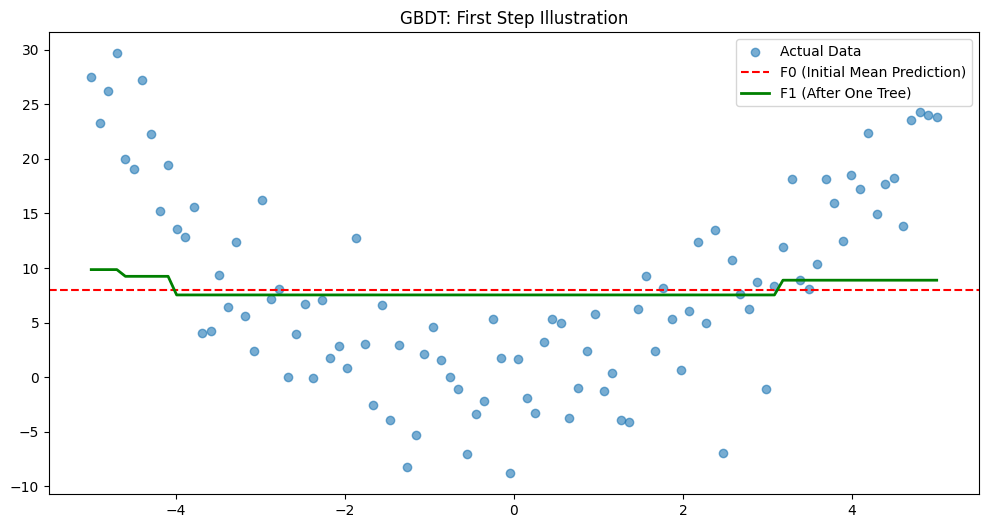


观察图像: 绿色线 F1 比红色线 F0 更接近真实数据分布。
GBDT会继续计算 F1 的残差，并训练第二棵树 h2 来拟合新的残差，不断迭代。


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# --- 1. 创建一些示例数据 ---
np.random.seed(42)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = X.ravel()**2 + np.random.normal(0, 5, 100) # 一个二次函数关系

# --- GBDT 第一步: 训练一个初始模型 F0 ---
# 初始模型通常是目标值的均值
f0 = np.mean(y)
print(f"初始模型 F0 的预测值 (所有样本都一样): {f0:.4f}")

# --- GBDT 第二步: 计算残差 (负梯度) ---
# Residuals = Actual - Prediction
residuals1 = y - f0

# --- GBDT 第三步: 训练第一棵树 h1 来拟合残差 ---
h1 = DecisionTreeRegressor(max_depth=2, random_state=42)
h1.fit(X, residuals1)

# --- GBDT 第四步: 更新模型 F1 = F0 + learning_rate * h1 ---
learning_rate = 0.1
f1 = f0 + learning_rate * h1.predict(X)

# --- 可视化 ---
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Actual Data', alpha=0.6)
plt.axhline(f0, color='red', linestyle='--', label='F0 (Initial Mean Prediction)')
plt.plot(X, f1, color='green', linewidth=2, label='F1 (After One Tree)')
plt.title("GBDT: First Step Illustration")
plt.legend()
plt.show()

print("\n观察图像: 绿色线 F1 比红色线 F0 更接近真实数据分布。")
print("GBDT会继续计算 F1 的残差，并训练第二棵树 h2 来拟合新的残差，不断迭代。")

In [13]:
import time
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# --- 1. 创建一个较大的数据集来对比速度 ---
X, y = make_classification(n_samples=50000, n_features=50, n_informative=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 对比训练速度 ---
# a. Scikit-learn GBDT
print("--- 训练速度对比 ---")
start_time = time.time()
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbdt.fit(X_train, y_train)
gbdt_time = time.time() - start_time
print(f"Scikit-learn GBDT 训练耗时: {gbdt_time:.4f} 秒")

# b. XGBoost
start_time = time.time()
xgboost = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)
xgboost_time = time.time() - start_time
print(f"XGBoost 训练耗时: {xgboost_time:.4f} 秒")


# --- 2. 对比缺失值处理能力 ---
print("\n--- 缺失值处理能力对比 ---")
X_with_nan = X_train.copy()
# 人为制造一些缺失值
X_with_nan[0, 0] = np.nan
X_with_nan[5, 10] = np.nan

# a. Scikit-learn GBDT
try:
    gbdt.fit(X_with_nan, y_train)
except ValueError as e:
    print(f"Scikit-learn GBDT 遇到缺失值时报错: {e}")

# b. XGBoost
try:
    xgboost.fit(X_with_nan, y_train)
    print("XGBoost 成功处理了含有缺失值的数据并完成训练。")
except Exception as e:
    print(f"XGBoost 遇到缺失值时报错: {e}")

--- 训练速度对比 ---
Scikit-learn GBDT 训练耗时: 42.3717 秒


/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:06:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost 训练耗时: 0.3794 秒

--- 缺失值处理能力对比 ---
Scikit-learn GBDT 遇到缺失值时报错: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


/Users/mapleandrew/.pyenv/versions/3.12.10/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:06:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost 成功处理了含有缺失值的数据并完成训练。


In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- 创建数据集 ---
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 模型1: 单个决策树 (弱学习器) ---
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)
y_pred_tree = single_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"单个决策树的准确率: {accuracy_tree:.4f}")

# --- 模型2: 随机森林 (集成模型) ---
# 随机森林是100棵决策树的集成
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"随机森林 (100棵树的集成) 的准确率: {accuracy_rf:.4f}")

print("\n结论: 集成模型(随机森林)的性能通常显著优于其内部的任何单个模型(决策树)。")

单个决策树的准确率: 0.8167
随机森林 (100棵树的集成) 的准确率: 0.9167

结论: 集成模型(随机森林)的性能通常显著优于其内部的任何单个模型(决策树)。
